In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib_venn import venn3, venn2
pd.options.display.max_rows = 2000

In [3]:
pd.options.display.max_colwidth = 120

In [4]:
df = pd.read_csv("out/df_subtract_norm.csv", index_col=0)
df = df[df.sum(1)!=0]  # drop empty rows
df.head()
df.shape

(14572, 6)

In [5]:
# venn where a protein cluster is selected if it is in >=1 sample per group
df['unenriched'] = df['unenriched1'] + df['unenriched2'] + df['unenriched3']
df['vk'] = df['VK1rep1'] + df['VK3rep1'] + df['VK5rep1']
df.head()

,VK1rep1,VK3rep1,VK5rep1,unenriched1,unenriched2,unenriched3,unenriched,vk
86769,0.000000,6.808247,0.000000,9.857152,10.963863,11.008983,31.829998,6.808247
187020,0.000000,0.000000,0.000000,2.464288,3.373496,4.234224,10.072009,0.000000
202956,11.393186,11.347079,22.179437,11.500011,12.650612,10.162138,34.312760,44.919701
209005,17.607651,13.616495,11.089718,10.678581,13.493986,19.477431,43.649998,42.313864
374028,0.000000,0.000000,0.000000,13.142869,13.493986,13.549517,40.186372,0.000000


In [6]:
df[df.vk==0].shape

(2219, 8)

In [7]:
unenriched = set(df[df['unenriched']>0].index)
vk = set(df[df['vk']>0].index)

In [8]:
locus_df = pd.read_csv("out/locus_df.csv", index_col=0)
locus_df.head(2)

,gn,gn1,human_mouse,lca,name
86769,CP,CP,False,12234.0,sp|Q9Q1T6|CAPSD_TOMK1 Capsid protein OS=Tomato mosaic virus (strain Kazakh K1) GN=CP PE=1 SV=3
187020,NaN,NaN,False,10663.0,gi|37651489|ref|NP_932363.1| hypothetical protein ST44RRORF008c [Aeromonas phage 44RR2.8t]


In [9]:
not_in_vk = unenriched - vk
not_in_unenriched = vk - unenriched

In [10]:
# not_in_vk
locus_df[locus_df.index.isin(not_in_vk)]

,gn,gn1,human_mouse,lca,name
187020,NaN,NaN,False,10663.0,gi|37651489|ref|NP_932363.1| hypothetical protein ST44RRORF008c [Aeromonas phage 44RR2.8t]
374028,NaN,NaN,False,4893.0,gi|254585887|ref|XP_002498511.1| ZYRO0G12012p [Zygosaccharomyces rouxii]
996140,NaN,NaN,False,4893.0,gi|45184967|ref|NP_982685.1| AAR143Wp [Ashbya gossypii ATCC 10895]
1026553,NaN,NaN,False,28556.0,gi|627821415|ref|XP_007683547.1| hypothetical protein COCMIDRAFT_83420 [Bipolaris oryzae ATCC 44560]
1586831,"glyA1,glyA",NaN,False,2157.0,gi|495596057|ref|WP_008320636.1| serine hydroxymethyltransferase [Haloferax mucosum]
1849115,glyA,glyA,False,266779.0,gi|499897987|ref|WP_011578721.1| serine hydroxymethyltransferase [Chelativorans sp. BNC1]
2106886,NaN,NaN,False,905079.0,gi|551636635|ref|XP_005821141.1| hypothetical protein GUITHDRAFT_119655 [Guillardia theta CCMP2712]
2409733,NaN,NaN,False,556484.0,gi|219127281|ref|XP_002183867.1| predicted protein [Phaeodactylum tricornutum CCAP 1055/1]
2569637,glyA,glyA,False,101192.0,gi|505138541|ref|WP_015325643.1| glycine/serine hydroxymethyltransferase [Methanomethylovorans hollandica]
2596686,glyA,glyA,False,2191.0,gi|499766364|ref|WP_011447098.1| serine hydroxymethyltransferase [Methanospirillum hungatei]


In [11]:
# not_in_unenriched
locus_df[locus_df.index.isin(not_in_unenriched)]

,gn,gn1,human_mouse,lca,name
733338,NaN,NaN,False,28901.0,"gi|487585773|ref|WP_001724780.1| glyceraldehyde-3-phosphate dehydrogenase A, partial [Salmonella enterica]"
2114380,NaN,NaN,False,543.0,"gi|582975397|ref|WP_024146899.1| bifunctional aconitate hydratase 2/2-methylisocitrate dehydratase, partial [Salmone..."
2478382,NaN,NaN,False,28901.0,"gi|446363992|ref|WP_000441847.1| hypothetical protein, partial [Salmonella enterica]"
3520520,NaN,NaN,False,NaN,1_GL0057565_1_498_+
3607846,NaN,NaN,False,562.0,"gi|446723195|ref|WP_000800508.1| hypothetical protein, partial [Escherichia coli]"
3675519,"AU68_19010,AU81_18690,AV17_18630,AV57_18665,AU91_18670,CFSAN001080_14525,AU99_18660,AV01_18660,AV68_23825,AV86_18685...",NaN,False,1236.0,gi|446863094|ref|WP_000940350.1| 30S ribosomal protein S5 [Escherichia coli]
3740901,"VC_2087,sucA,T2140,VCD_002280,M634_06245,VPUCM_2377,VP0847,VVMO6_02195,VAA_03410,vfu_A01234,N175_05545,VPBB_0804,VIB...",NaN,False,1236.0,gi|493761814|ref|WP_006710479.1| 2-oxoglutarate dehydrogenase E1 [Vibrio ichthyoenteri]
3776526,NaN,NaN,False,NaN,SRS017191.122902-T1-C
3992094,NaN,NaN,False,NaN,MH0267_GL0100303 [gene] locus=scaffold33_2:890:1804:+ [Complete] codon-table.11
4427266,dnaK,dnaK,False,1236.0,gi|517453077|ref|WP_018623870.1| molecular chaperone DnaK [Kangiella aquimarina]


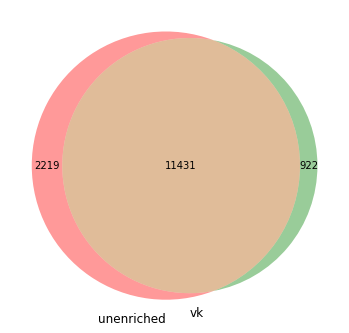

In [12]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn2([unenriched,vk], ["unenriched", "vk"])

In [13]:
unenriched1 = set(df[df['unenriched1']>0].index)
unenriched2 = set(df[df['unenriched2']>0].index)
unenriched3 = set(df[df['unenriched3']>0].index)

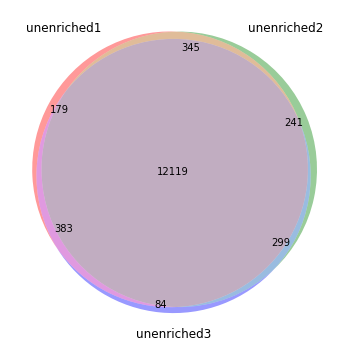

In [14]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn3([unenriched1,unenriched2,unenriched3], ["unenriched1", "unenriched2", "unenriched3"])

In [15]:
vk1 = set(df[df['VK1rep1']>0].index)
vk2 = set(df[df['VK3rep1']>0].index)
vk3 = set(df[df['VK5rep1']>0].index)

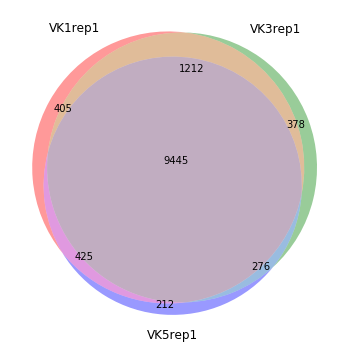

In [16]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn3([vk1,vk2,vk3], ["VK1rep1", "VK3rep1", "VK5rep1"])